In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [194]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 loss와 acc 시각화
from sklearn.metrics import confusion_matrix
# quiz에서는 scale 조정, train_test_split 등을 추가

In [3]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print('타겟 : ', data[0,0])
print('이미지(28*28을 1차원으로) : ', data[0,1:])

타겟 :  5.0
이미지(28*28을 1차원으로) :  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [5]:
for row in data[1,1:].reshape(28,28) :
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

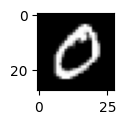

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(data[1,1:].reshape(28,28), cmap='gray')

In [14]:
# %pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 2.4/46.2 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/46.2 MB 11.4 MB/s eta 0:00:04
   ------ --------------------------------- 7.3/46.2 MB 11.6 MB/s eta 0:00:04
   -------- ------------------------------- 9.4/46.2 MB 11.5 MB/s eta 0:00:04
   --------- ------------------------------ 11.5/46.2 MB 11.1 MB/s eta 0:00:04
   ------------ --------------------------- 14.2/46.2 MB 11.1 MB/s eta 0:00:03
   -------------- ------------------------- 16.3/46.2 MB 10.9 MB/s eta 0:00:03
   --------------- ------------------------ 18.1/46.2 MB 10.7 MB/s eta 0:00:03
   ----------------- ---------------------- 20.4/46.2 MB 10.8 MB/s eta 0:00:03
   ------------------- -------------------- 22.8/46.2 MB 10.8 MB/s eta 0:00:03
   --------------------- ------------------ 25.2/46.2 MB 10.9 MB/s eta 0:00:02
   ----------------------- ---------------- 27.3/46.2 MB 10.9 MB/

In [15]:
# %pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/39.5 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/39.5 MB 11.9 MB/s eta 0:00:03
   ------- -------------------------------- 7.3/39.5 MB 11.6 MB/s eta 0:00:03
   --------- ------------------------------ 9.7/39.5 MB 11.6 MB/s eta 0:00:03
   ------------ --------------------------- 12.1/39.5 MB 11.8 MB/s eta 0:00:03
   -------------- ------------------------- 14.4/39.5 MB 11.8 MB/s eta 0:00:03
   ---------------- ----------------------- 16.8/39.5 MB 11.7 MB/s eta 0:00:02
   ------------------- -------------------- 19.1/39.5 MB 11.7 MB/s eta 0:00:02
   --------------------- ------------------ 21.5/39.5 MB 11.7 MB/s eta 0:00:02
   ------------------------ --------------- 24.1/39.5 MB 11.7 MB/s eta 0:00:02
   -------------------------- ------------- 26.5/39.5 MB 11.7 MB/s eta 0:00:02
   ----------------------------- ---------- 28.8/39.5 MB 11.7 MB/

In [30]:
# 칼라사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('data/img.jpg', cv2.IMREAD_GRAYSCALE)
print(image_gray.shape)
print(type(image_gray))

(3055, 4585)
<class 'numpy.ndarray'>


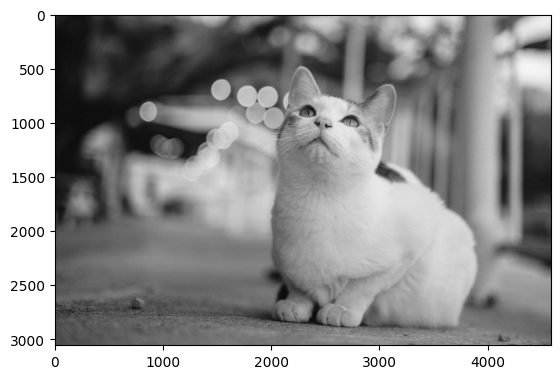

In [33]:
# plt.figure(figsize=(100,100))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [151]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [152]:
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

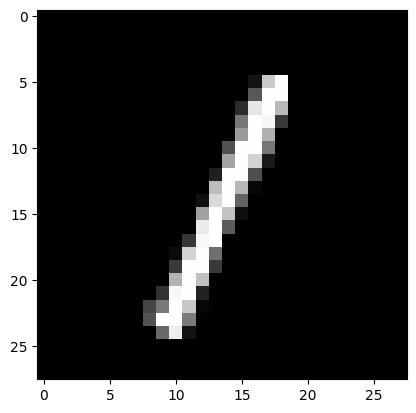

In [153]:
plt.imshow(X_train[59958], cmap='gray')

In [154]:
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [155]:
# 학습셋(5만개 : fit용), 검증셋(만개 : fit용), 테스트셋(만개 : 평가용)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [156]:
# 입력(독립)변수 (n, 28, 28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눔)
train_X = X_train.reshape(50000, -1).astype('float32')/255.0   # 실수로 나누는 것은 기본이 float64
val_X = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [157]:
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[5 0]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [158]:
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, -1).astype('float32')/255.0   # 실수로 나누는 것은 기본이 float64
val_X = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 훈련셋 5만개 -> 700개, 테스트셋1만개 -> 300개 추출(목적 : 학습시간 절약)
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2. 모델 구성

In [159]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2)                 1570      
                                                                 
 dense_8 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [160]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy -> 원핫인코딩 안할 경우 사용
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습

In [166]:
%%time
hist = model.fit(train_X, train_Y,
                epochs=1000,
                batch_size=100,  # pc ram 작으면 작게.
                validation_data=(val_X, val_Y))

Epoch 1/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.9765 - accuracy: 0.6714 - val_loss: 1.7982 - val_accuracy: 0.5033
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9758 - accuracy: 0.6729 - val_loss: 1.7987 - val_accuracy: 0.5033
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.9752 - accuracy: 0.6714 - val_loss: 1.8026 - val_accuracy: 0.5100
Epoch 4/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.9746 - accuracy: 0.6700 - val_loss: 1.8005 - val_accuracy: 0.5033
Epoch 5/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9742 - accuracy: 0.6743 - val_loss: 1.8019 - val_accuracy: 0.5033
Epoch 6/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9739 - accuracy: 0.6757 - val_loss: 1.8081 - val_accuracy: 0.5067
Epoch 7/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9733 - accuracy: 0.6729 - val_loss: 1.8079 - val_accuracy: 0.5067
Epoch 8/1000
7/7 [=

7/7 [==============================] - 0s 7ms/step - loss: 0.9487 - accuracy: 0.6800 - val_loss: 1.9164 - val_accuracy: 0.5133
Epoch 60/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9492 - accuracy: 0.6814 - val_loss: 1.8947 - val_accuracy: 0.5033
Epoch 61/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9493 - accuracy: 0.6800 - val_loss: 1.9124 - val_accuracy: 0.5133
Epoch 62/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9480 - accuracy: 0.6786 - val_loss: 1.9080 - val_accuracy: 0.5100
Epoch 63/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9475 - accuracy: 0.6771 - val_loss: 1.9056 - val_accuracy: 0.5000
Epoch 64/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9470 - accuracy: 0.6786 - val_loss: 1.9159 - val_accuracy: 0.5133
Epoch 65/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9466 - accuracy: 0.6771 - val_loss: 1.9150 - val_accuracy: 0.5167
Epoch 66/1000
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.9261 - accuracy: 0.6814 - val_loss: 2.0184 - val_accuracy: 0.5100
Epoch 118/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9258 - accuracy: 0.6814 - val_loss: 2.0164 - val_accuracy: 0.5067
Epoch 119/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9250 - accuracy: 0.6800 - val_loss: 2.0359 - val_accuracy: 0.5100
Epoch 120/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9249 - accuracy: 0.6843 - val_loss: 2.0207 - val_accuracy: 0.5067
Epoch 121/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9246 - accuracy: 0.6814 - val_loss: 2.0344 - val_accuracy: 0.5067
Epoch 122/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9241 - accuracy: 0.6829 - val_loss: 2.0379 - val_accuracy: 0.5100
Epoch 123/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9238 - accuracy: 0.6829 - val_loss: 2.0287 - val_accuracy: 0.5033
Epoch 124/1000
7/7 [=

Epoch 175/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9057 - accuracy: 0.6914 - val_loss: 2.1478 - val_accuracy: 0.5133
Epoch 176/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9052 - accuracy: 0.6914 - val_loss: 2.1434 - val_accuracy: 0.5133
Epoch 177/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9049 - accuracy: 0.6914 - val_loss: 2.1515 - val_accuracy: 0.5133
Epoch 178/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9046 - accuracy: 0.6914 - val_loss: 2.1453 - val_accuracy: 0.5100
Epoch 179/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9046 - accuracy: 0.6943 - val_loss: 2.1571 - val_accuracy: 0.5167
Epoch 180/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9041 - accuracy: 0.6929 - val_loss: 2.1465 - val_accuracy: 0.5133
Epoch 181/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9040 - accuracy: 0.6929 - val_loss: 2.1633 - val_accuracy: 0.5100
Epoch 

Epoch 233/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8879 - accuracy: 0.6971 - val_loss: 2.2636 - val_accuracy: 0.5100
Epoch 234/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8878 - accuracy: 0.6971 - val_loss: 2.2683 - val_accuracy: 0.5067
Epoch 235/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8870 - accuracy: 0.7000 - val_loss: 2.2726 - val_accuracy: 0.5100
Epoch 236/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8872 - accuracy: 0.6971 - val_loss: 2.2676 - val_accuracy: 0.5100
Epoch 237/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8871 - accuracy: 0.7000 - val_loss: 2.2594 - val_accuracy: 0.5167
Epoch 238/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8874 - accuracy: 0.6986 - val_loss: 2.2734 - val_accuracy: 0.5167
Epoch 239/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8867 - accuracy: 0.6971 - val_loss: 2.2835 - val_accuracy: 0.5133
Epoch 

Epoch 291/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8715 - accuracy: 0.7071 - val_loss: 2.3868 - val_accuracy: 0.5100
Epoch 292/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8709 - accuracy: 0.7057 - val_loss: 2.3942 - val_accuracy: 0.5133
Epoch 293/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8704 - accuracy: 0.7057 - val_loss: 2.4004 - val_accuracy: 0.5133
Epoch 294/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8701 - accuracy: 0.7071 - val_loss: 2.3954 - val_accuracy: 0.5067
Epoch 295/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8697 - accuracy: 0.7057 - val_loss: 2.4048 - val_accuracy: 0.5167
Epoch 296/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8693 - accuracy: 0.7071 - val_loss: 2.4026 - val_accuracy: 0.5067
Epoch 297/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8689 - accuracy: 0.7071 - val_loss: 2.4092 - val_accuracy: 0.5167
Epoch 

Epoch 349/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8565 - accuracy: 0.7157 - val_loss: 2.4942 - val_accuracy: 0.5100
Epoch 350/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8566 - accuracy: 0.7143 - val_loss: 2.5365 - val_accuracy: 0.5167
Epoch 351/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8561 - accuracy: 0.7171 - val_loss: 2.5192 - val_accuracy: 0.5200
Epoch 352/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8556 - accuracy: 0.7143 - val_loss: 2.5334 - val_accuracy: 0.5133
Epoch 353/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8552 - accuracy: 0.7157 - val_loss: 2.5345 - val_accuracy: 0.5133
Epoch 354/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8549 - accuracy: 0.7114 - val_loss: 2.5321 - val_accuracy: 0.5133
Epoch 355/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8544 - accuracy: 0.7143 - val_loss: 2.5507 - val_accuracy: 0.5133
Epoch 

Epoch 407/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8421 - accuracy: 0.7214 - val_loss: 2.6672 - val_accuracy: 0.5167
Epoch 408/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8422 - accuracy: 0.7186 - val_loss: 2.6660 - val_accuracy: 0.5167
Epoch 409/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8417 - accuracy: 0.7214 - val_loss: 2.6728 - val_accuracy: 0.5133
Epoch 410/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8414 - accuracy: 0.7214 - val_loss: 2.6763 - val_accuracy: 0.5100
Epoch 411/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8413 - accuracy: 0.7243 - val_loss: 2.6594 - val_accuracy: 0.5133
Epoch 412/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8414 - accuracy: 0.7229 - val_loss: 2.6720 - val_accuracy: 0.5133
Epoch 413/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8409 - accuracy: 0.7229 - val_loss: 2.6698 - val_accuracy: 0.5133
Epoch 

Epoch 465/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8277 - accuracy: 0.7286 - val_loss: 2.7879 - val_accuracy: 0.5167
Epoch 466/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8279 - accuracy: 0.7271 - val_loss: 2.7981 - val_accuracy: 0.5200
Epoch 467/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8272 - accuracy: 0.7286 - val_loss: 2.8036 - val_accuracy: 0.5167
Epoch 468/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8272 - accuracy: 0.7286 - val_loss: 2.8079 - val_accuracy: 0.5167
Epoch 469/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8268 - accuracy: 0.7271 - val_loss: 2.8071 - val_accuracy: 0.5133
Epoch 470/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8269 - accuracy: 0.7271 - val_loss: 2.8170 - val_accuracy: 0.5200
Epoch 471/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8267 - accuracy: 0.7257 - val_loss: 2.8191 - val_accuracy: 0.5133
Epoch 

Epoch 523/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8158 - accuracy: 0.7300 - val_loss: 2.9663 - val_accuracy: 0.5233
Epoch 524/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8154 - accuracy: 0.7300 - val_loss: 2.9419 - val_accuracy: 0.5167
Epoch 525/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8152 - accuracy: 0.7300 - val_loss: 2.9633 - val_accuracy: 0.5200
Epoch 526/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8150 - accuracy: 0.7300 - val_loss: 2.9577 - val_accuracy: 0.5167
Epoch 527/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8147 - accuracy: 0.7300 - val_loss: 2.9655 - val_accuracy: 0.5167
Epoch 528/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8144 - accuracy: 0.7300 - val_loss: 2.9662 - val_accuracy: 0.5167
Epoch 529/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8141 - accuracy: 0.7300 - val_loss: 2.9662 - val_accuracy: 0.5167
Epoch 

Epoch 581/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8053 - accuracy: 0.7314 - val_loss: 3.0910 - val_accuracy: 0.5233
Epoch 582/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8052 - accuracy: 0.7314 - val_loss: 3.0844 - val_accuracy: 0.5167
Epoch 583/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8049 - accuracy: 0.7314 - val_loss: 3.1017 - val_accuracy: 0.5233
Epoch 584/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8046 - accuracy: 0.7314 - val_loss: 3.1007 - val_accuracy: 0.5167
Epoch 585/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8044 - accuracy: 0.7314 - val_loss: 3.0890 - val_accuracy: 0.5233
Epoch 586/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8045 - accuracy: 0.7329 - val_loss: 3.1182 - val_accuracy: 0.5233
Epoch 587/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8041 - accuracy: 0.7314 - val_loss: 3.0914 - val_accuracy: 0.5200
Epoch 

Epoch 639/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7955 - accuracy: 0.7329 - val_loss: 3.2442 - val_accuracy: 0.5133
Epoch 640/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7952 - accuracy: 0.7314 - val_loss: 3.2494 - val_accuracy: 0.5167
Epoch 641/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7951 - accuracy: 0.7343 - val_loss: 3.2553 - val_accuracy: 0.5200
Epoch 642/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7949 - accuracy: 0.7329 - val_loss: 3.2532 - val_accuracy: 0.5200
Epoch 643/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7950 - accuracy: 0.7343 - val_loss: 3.2583 - val_accuracy: 0.5133
Epoch 644/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7949 - accuracy: 0.7343 - val_loss: 3.2452 - val_accuracy: 0.5200
Epoch 645/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7947 - accuracy: 0.7343 - val_loss: 3.2536 - val_accuracy: 0.5133
Epoch 

Epoch 697/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7869 - accuracy: 0.7371 - val_loss: 3.3799 - val_accuracy: 0.5200
Epoch 698/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7868 - accuracy: 0.7386 - val_loss: 3.3972 - val_accuracy: 0.5233
Epoch 699/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7869 - accuracy: 0.7400 - val_loss: 3.3988 - val_accuracy: 0.5133
Epoch 700/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7866 - accuracy: 0.7386 - val_loss: 3.4034 - val_accuracy: 0.5233
Epoch 701/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7865 - accuracy: 0.7371 - val_loss: 3.4102 - val_accuracy: 0.5167
Epoch 702/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7862 - accuracy: 0.7371 - val_loss: 3.4081 - val_accuracy: 0.5200
Epoch 703/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7861 - accuracy: 0.7386 - val_loss: 3.3968 - val_accuracy: 0.5200
Epoch 

Epoch 755/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7785 - accuracy: 0.7414 - val_loss: 3.5478 - val_accuracy: 0.5167
Epoch 756/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7784 - accuracy: 0.7414 - val_loss: 3.5591 - val_accuracy: 0.5167
Epoch 757/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7784 - accuracy: 0.7400 - val_loss: 3.5514 - val_accuracy: 0.5167
Epoch 758/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7784 - accuracy: 0.7400 - val_loss: 3.5715 - val_accuracy: 0.5200
Epoch 759/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7780 - accuracy: 0.7414 - val_loss: 3.5500 - val_accuracy: 0.5200
Epoch 760/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7780 - accuracy: 0.7414 - val_loss: 3.5767 - val_accuracy: 0.5233
Epoch 761/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7779 - accuracy: 0.7400 - val_loss: 3.5689 - val_accuracy: 0.5233
Epoch 

Epoch 813/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7713 - accuracy: 0.7429 - val_loss: 3.7021 - val_accuracy: 0.5200
Epoch 814/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7713 - accuracy: 0.7429 - val_loss: 3.7046 - val_accuracy: 0.5100
Epoch 815/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7715 - accuracy: 0.7457 - val_loss: 3.7190 - val_accuracy: 0.5167
Epoch 816/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7712 - accuracy: 0.7443 - val_loss: 3.6931 - val_accuracy: 0.5167
Epoch 817/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7711 - accuracy: 0.7443 - val_loss: 3.7369 - val_accuracy: 0.5167
Epoch 818/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7708 - accuracy: 0.7429 - val_loss: 3.7153 - val_accuracy: 0.5100
Epoch 819/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7707 - accuracy: 0.7443 - val_loss: 3.7510 - val_accuracy: 0.5200
Epoch 

Epoch 871/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7647 - accuracy: 0.7414 - val_loss: 3.8591 - val_accuracy: 0.5233
Epoch 872/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7645 - accuracy: 0.7429 - val_loss: 3.8619 - val_accuracy: 0.5167
Epoch 873/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7642 - accuracy: 0.7214 - val_loss: 3.8814 - val_accuracy: 0.5133
Epoch 874/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7643 - accuracy: 0.7314 - val_loss: 3.8675 - val_accuracy: 0.5167
Epoch 875/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7637 - accuracy: 0.7429 - val_loss: 3.9011 - val_accuracy: 0.5233
Epoch 876/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7640 - accuracy: 0.7414 - val_loss: 3.8758 - val_accuracy: 0.5200
Epoch 877/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7636 - accuracy: 0.7414 - val_loss: 3.8799 - val_accuracy: 0.5233
Epoch 

Epoch 929/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.7580 - accuracy: 0.7257 - val_loss: 4.0009 - val_accuracy: 0.5167
Epoch 930/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7580 - accuracy: 0.7286 - val_loss: 4.0544 - val_accuracy: 0.5167
Epoch 931/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7579 - accuracy: 0.7300 - val_loss: 4.0133 - val_accuracy: 0.5167
Epoch 932/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7577 - accuracy: 0.7300 - val_loss: 4.0614 - val_accuracy: 0.5167
Epoch 933/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7582 - accuracy: 0.7286 - val_loss: 4.0223 - val_accuracy: 0.5200
Epoch 934/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7578 - accuracy: 0.7471 - val_loss: 4.0331 - val_accuracy: 0.5233
Epoch 935/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7576 - accuracy: 0.7429 - val_loss: 4.0396 - val_accuracy: 0.5233
Epoch 

Epoch 987/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7517 - accuracy: 0.7471 - val_loss: 4.1930 - val_accuracy: 0.5233
Epoch 988/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7517 - accuracy: 0.7457 - val_loss: 4.1818 - val_accuracy: 0.5200
Epoch 989/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7515 - accuracy: 0.7471 - val_loss: 4.1833 - val_accuracy: 0.5233
Epoch 990/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7514 - accuracy: 0.7471 - val_loss: 4.1924 - val_accuracy: 0.5233
Epoch 991/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7512 - accuracy: 0.7471 - val_loss: 4.1930 - val_accuracy: 0.5200
Epoch 992/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.7512 - accuracy: 0.7457 - val_loss: 4.2038 - val_accuracy: 0.5200
Epoch 993/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7511 - accuracy: 0.7486 - val_loss: 4.2158 - val_accuracy: 0.5200
Epoch 

In [163]:
# 학습 과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

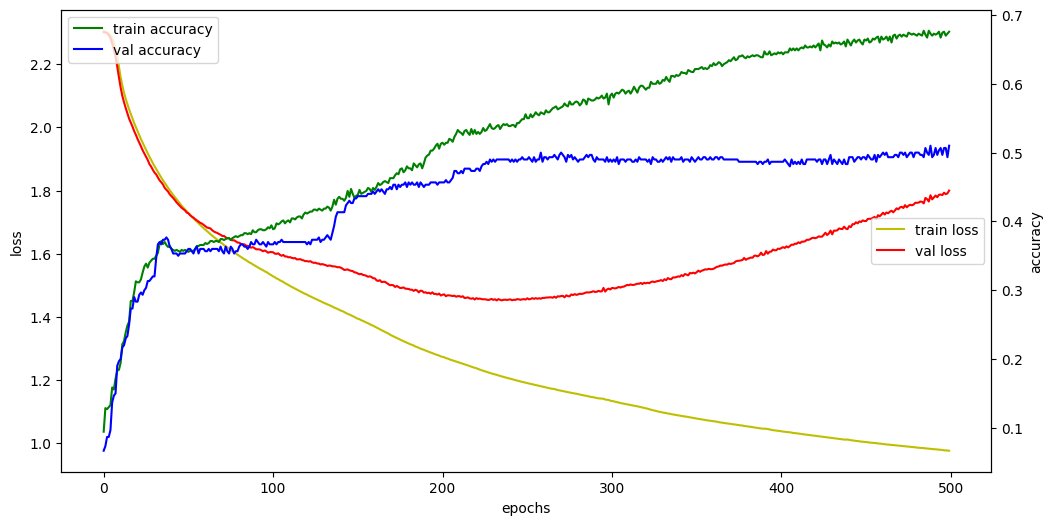

In [164]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# 5. 모델 평가하기

In [165]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 1.69637131690979
accuracy : 0.4645000100135803


# 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 레이어 추가
- 과적합 방지(validation data 추가, dropout, 활성화함수relu계열, tanh)
- epoch 조정
- optimizer 변경

Epoch 1/45
500/500 [==============================] - 14s 28ms/step - loss: 0.2905 - accuracy: 0.9104 - val_loss: 0.1136 - val_accuracy: 0.9653
Epoch 2/45
500/500 [==============================] - 14s 28ms/step - loss: 0.1230 - accuracy: 0.9632 - val_loss: 0.0835 - val_accuracy: 0.9743
Epoch 3/45
500/500 [==============================] - 14s 28ms/step - loss: 0.0941 - accuracy: 0.9705 - val_loss: 0.0748 - val_accuracy: 0.9779
Epoch 4/45
500/500 [==============================] - 14s 27ms/step - loss: 0.0747 - accuracy: 0.9770 - val_loss: 0.0752 - val_accuracy: 0.9777
Epoch 5/45
500/500 [==============================] - 14s 28ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0831 - val_accuracy: 0.9781
Epoch 6/45
500/500 [==============================] - 14s 28ms/step - loss: 0.0586 - accuracy: 0.9825 - val_loss: 0.0767 - val_accuracy: 0.9778
Epoch 7/45
500/500 [==============================] - 14s 29ms/step - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0783 - val_accuracy:

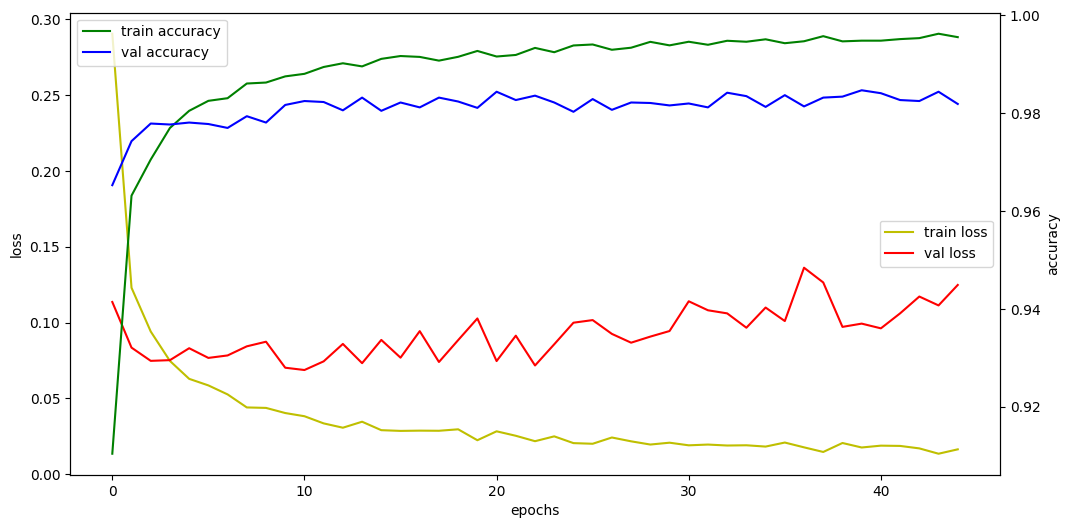

loss : 0.10830250382423401
accuracy : 0.984000027179718
CPU times: total: 59min 22s
Wall time: 10min 52s


In [185]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
# train_idx = np.random.choice(50000, 10000)
# val_idx  = np.random.choice(10000, 3000)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X   = val_X[val_idx]
# y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu')) # tanh, relu, elu, gelu
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=45,
                batch_size=100,
                validation_data=(val_X, val_Y))
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

In [186]:
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 0.10830250382423401
accuracy : 0.984000027179718


In [187]:
# 실제값
test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [191]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [192]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,971,1,0,1,0,0,5,1,1,0
1,0,1131,1,0,0,0,2,0,1,0
2,2,1,1015,1,0,0,3,6,4,0
3,0,0,3,989,0,9,0,5,2,2
4,1,0,2,1,966,0,6,1,0,5
5,2,0,0,4,0,882,3,0,0,1
6,2,3,0,1,1,3,948,0,0,0
7,1,2,6,1,2,0,0,1010,2,4
8,0,1,4,5,6,8,0,3,942,5


In [195]:
confusion_matrix(y_test,yhat)

array([[ 971,    1,    0,    1,    0,    0,    5,    1,    1,    0],
       [   0, 1131,    1,    0,    0,    0,    2,    0,    1,    0],
       [   2,    1, 1015,    1,    0,    0,    3,    6,    4,    0],
       [   0,    0,    3,  989,    0,    9,    0,    5,    2,    2],
       [   1,    0,    2,    1,  966,    0,    6,    1,    0,    5],
       [   2,    0,    0,    4,    0,  882,    3,    0,    0,    1],
       [   2,    3,    0,    1,    1,    3,  948,    0,    0,    0],
       [   1,    2,    6,    1,    2,    0,    0, 1010,    2,    4],
       [   0,    1,    4,    5,    6,    8,    0,    3,  942,    5],
       [   2,    4,    0,    0,    7,    4,    1,    3,    2,  986]],
      dtype=int64)

In [196]:
# 틀린 갯수 :
10000-10000*loss_and_metrics[1]

159.99972820281982

In [198]:
cnt = 0
for y, h in zip(y_test, yhat) :
    if y!=h:
        cnt+=1
print('틀린 갯수 : ', cnt)

틀린 갯수 :  160


In [200]:
# 모델 저장
model.save('model/08_mnist.h5')

# ※콜백함수1 : 로그 출력

In [202]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

0
Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 2.2340 - accuracy: 0.1603 - val_loss: 2.1851 - val_accuracy: 0.1777
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 2.0912 - accuracy: 0.1942 - val_loss: 1.9068 - val_accuracy: 0.2777
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 1.8353 - accuracy: 0.3319 - val_loss: 1.7939 - val_accuracy: 0.3507
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 1.7539 - accuracy: 0.3711 - val_loss: 1.7336 - val_accuracy: 0.3677
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 1.7040 - accuracy: 0.3795 - val_loss: 1.6938 - val_accuracy: 0.3757
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 1.6687 - accuracy: 0.3853 - val_loss: 1.6640 - val_accuracy: 0.3743
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 1.6415 - accuracy: 0.3870 - val_loss: 1.6410 - val_accuracy: 0.3780
Epoc

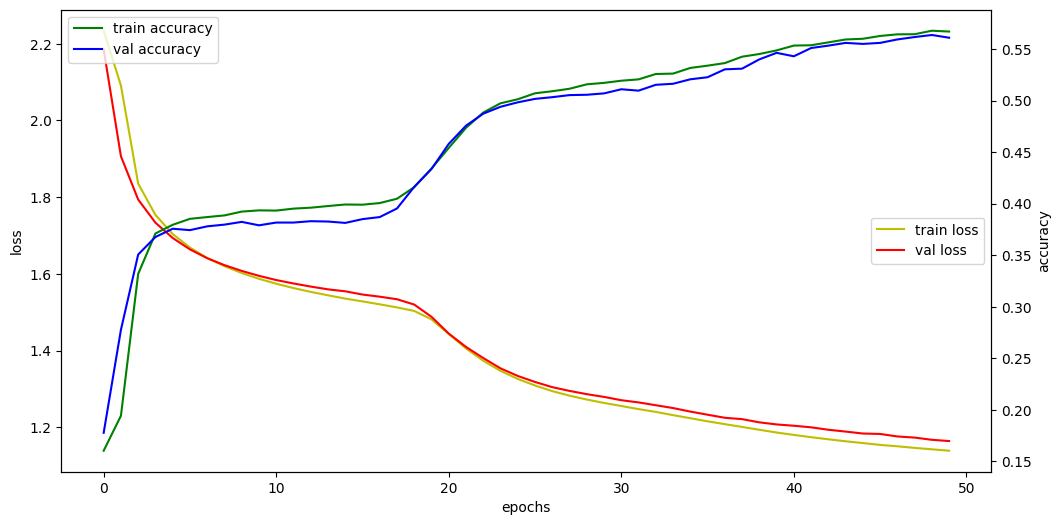

loss : 1.1966809034347534
accuracy : 0.5562999844551086
CPU times: total: 21.1 s
Wall time: 13.5 s


In [204]:
%%time
# 특정 epoch마다 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}) : # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1 # epoch마다 self.epoch 값을 1씩 증가
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                  format(self.epoch,
                        logs.get('loss'),
                        logs.get('accuracy', '-'),
                        logs.get('val_loss', '-'),
                        logs.get('val_accuracy', '-')
                        )
                 )
        
        
customHistory = CustomHistory()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
train_idx = np.random.choice(50000, 10000)
val_idx  = np.random.choice(10000, 3000)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수


In [205]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

epoch:10, loss:1.439725637435913, acc:0.48069998621940613, val_loss:1.4566692113876343, val_acc:0.4480000138282776
epoch:20, loss:1.251480221748352, acc:0.5841000080108643, val_loss:1.2679908275604248, val_acc:0.5706666707992554
epoch:30, loss:1.1303975582122803, acc:0.6399999856948853, val_loss:1.1530183553695679, val_acc:0.6166666746139526
epoch:40, loss:1.0599606037139893, acc:0.6626999974250793, val_loss:1.0952893495559692, val_acc:0.6426666378974915
epoch:50, loss:1.0114704370498657, acc:0.6787999868392944, val_loss:1.0545707941055298, val_acc:0.6683333516120911
CPU times: total: 15.7 s
Wall time: 10.3 s


# ※ 콜백함수2 : EarlyStopping
- val_loss 값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuary값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [208]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor기준으로 patience번 이상 안좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy',patience=2)
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping]) # 콜백함수

Epoch 1/500
100/100 [==============================] - 1s 4ms/step - loss: 2.1640 - accuracy: 0.1864 - val_loss: 2.0295 - val_accuracy: 0.2580
Epoch 2/500
100/100 [==============================] - 0s 2ms/step - loss: 1.9642 - accuracy: 0.2748 - val_loss: 1.8974 - val_accuracy: 0.2747
Epoch 3/500
100/100 [==============================] - 0s 2ms/step - loss: 1.8696 - accuracy: 0.2910 - val_loss: 1.8294 - val_accuracy: 0.2870
Epoch 4/500
100/100 [==============================] - 0s 2ms/step - loss: 1.8099 - accuracy: 0.3029 - val_loss: 1.7794 - val_accuracy: 0.2993
Epoch 5/500
100/100 [==============================] - 0s 2ms/step - loss: 1.7620 - accuracy: 0.3119 - val_loss: 1.7380 - val_accuracy: 0.3160
Epoch 6/500
100/100 [==============================] - 0s 3ms/step - loss: 1.7198 - accuracy: 0.3265 - val_loss: 1.7013 - val_accuracy: 0.3287
Epoch 7/500
100/100 [==============================] - 0s 2ms/step - loss: 1.6813 - accuracy: 0.3411 - val_loss: 1.6652 - val_accuracy: 0.3530

# ※ 콜백함수3 : ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장

In [213]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor기준으로 patience번 이상 안좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy',patience=10)
# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(filepath=file,
                            monitor='val_accuracy', # 모니터할 지표
                            save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                            mode = 'max', # 값이 클수록 저장
                            verbose=1 # 저장시 로그 출력
                            )

hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping, checkpoint]) # 콜백함수

Epoch 1/500
 99/100 [============================>.] - ETA: 0s - loss: 2.1363 - accuracy: 0.1927
Epoch 1: val_accuracy improved from -inf to 0.22733, saving model to ./model08\mnist-001-val0.2273.h5
100/100 [==============================] - 1s 3ms/step - loss: 2.1348 - accuracy: 0.1931 - val_loss: 1.9812 - val_accuracy: 0.2273
Epoch 2/500
 67/100 [===================>..........] - ETA: 0s - loss: 1.9266 - accuracy: 0.2799
Epoch 2: val_accuracy improved from 0.22733 to 0.29700, saving model to ./model08\mnist-002-val0.2970.h5
100/100 [==============================] - 0s 2ms/step - loss: 1.8988 - accuracy: 0.2875 - val_loss: 1.8133 - val_accuracy: 0.2970
Epoch 3/500
 68/100 [===================>..........] - ETA: 0s - loss: 1.7846 - accuracy: 0.3101
Epoch 3: val_accuracy improved from 0.29700 to 0.32433, saving model to ./model08\mnist-003-val0.3243.h5
100/100 [==============================] - 0s 2ms/step - loss: 1.7705 - accuracy: 0.3130 - val_loss: 1.7130 - val_accuracy: 0.3243
Epoc

100/100 [==============================] - 0s 3ms/step - loss: 1.1517 - accuracy: 0.5808 - val_loss: 1.1494 - val_accuracy: 0.5817
Epoch 27/500
 80/100 [=======================>......] - ETA: 0s - loss: 1.1423 - accuracy: 0.5849
Epoch 27: val_accuracy did not improve from 0.58167
100/100 [==============================] - 0s 2ms/step - loss: 1.1456 - accuracy: 0.5855 - val_loss: 1.1440 - val_accuracy: 0.5813
Epoch 28/500
 87/100 [=========================>....] - ETA: 0s - loss: 1.1363 - accuracy: 0.5916
Epoch 28: val_accuracy improved from 0.58167 to 0.58700, saving model to ./model08\mnist-028-val0.5870.h5
100/100 [==============================] - 0s 3ms/step - loss: 1.1388 - accuracy: 0.5905 - val_loss: 1.1378 - val_accuracy: 0.5870
Epoch 29/500
 82/100 [=======================>......] - ETA: 0s - loss: 1.1305 - accuracy: 0.5932
Epoch 29: val_accuracy did not improve from 0.58700
100/100 [==============================] - 0s 3ms/step - loss: 1.1328 - accuracy: 0.5944 - val_loss: 1.

Epoch 54/500
 82/100 [=======================>......] - ETA: 0s - loss: 1.0449 - accuracy: 0.6354
Epoch 54: val_accuracy did not improve from 0.62867
100/100 [==============================] - 0s 2ms/step - loss: 1.0477 - accuracy: 0.6329 - val_loss: 1.0766 - val_accuracy: 0.6260
Epoch 55/500
 94/100 [===========================>..] - ETA: 0s - loss: 1.0496 - accuracy: 0.6321
Epoch 55: val_accuracy did not improve from 0.62867
100/100 [==============================] - 0s 3ms/step - loss: 1.0455 - accuracy: 0.6332 - val_loss: 1.0748 - val_accuracy: 0.6230
Epoch 56/500
 82/100 [=======================>......] - ETA: 0s - loss: 1.0556 - accuracy: 0.6334
Epoch 56: val_accuracy did not improve from 0.62867
100/100 [==============================] - 0s 2ms/step - loss: 1.0435 - accuracy: 0.6363 - val_loss: 1.0722 - val_accuracy: 0.6247
Epoch 57/500
 83/100 [=======================>......] - ETA: 0s - loss: 1.0423 - accuracy: 0.6353
Epoch 57: val_accuracy did not improve from 0.62867
100/100

In [214]:
model.evaluate(val_X, val_Y)

94/94 [==============================] - 0s 1ms/step - loss: 1.0686 - accuracy: 0.6277


[1.0686025619506836, 0.6276666522026062]